### Background
This dataset deals with pollution in the U.S. It contains daily data for the four major pollutants NO2, O3, SO2 and CO during 2000 and 2010. The data set comes with 28 variables (among which each of the four pollutations represents five columns) and more than one million observations.

The source of this data set is https://www.kaggle.com/sogun3/uspollution. The original data was scraped from the database of U.S. EPA : https://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html

This notebook mainly deals with pollution in the state California, since it by far has the most data points. The focus of this work is on data cleaning and visualization.

Remarks and suggestions for improvement are very welcome.

In [3]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [4]:
raw_data = pd.read_csv('C:/Users/HP/Documents/Python Projects/US Pollution 2016/pollution_us_2000_2016.csv')

In [5]:
raw_data.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


Show all column names

In [6]:
raw_data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

Drop not needed columns

In [7]:
data = raw_data.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'County', 'NO2 Units', 
        'O3 Units', 'SO2 Units', 'CO Units'], axis = 1)

In [8]:
data.columns

Index(['State', 'City', 'Date Local', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean', 'O3 1st Max Value',
       'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value',
       'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean', 'CO 1st Max Value',
       'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

*Note: NO2 Mean, O3 Mean etc. all represent the mean of all the values recorded on that single day.* 

Show data descriptive statistics for all variables

In [9]:
data.describe(include='all')

,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1048575,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,524489.000000,1.048575e+06,1.048575e+06,1.048575e+06,524352.000000
unique,37,120,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,California,Not in a city,10/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,397532,65402,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.447425e+01,2.810977e+01,1.186842e+01,2.655708e+01,2.574110e-02,3.967055e-02,1.016144e+01,3.607080e+01,2.488623e+00,5.964118e+00,9.491689e+00,9.674317,4.221252e-01,7.282010e-01,8.058085e+00,7.026795
std,NaN,NaN,NaN,1.003320e+01,1.670082e+01,7.861519e+00,1.580662e+01,1.165894e-02,1.615542e-02,3.911422e+00,2.087103e+01,3.220715e+00,8.982167e+00,6.745944e+00,13.752017,3.601106e-01,7.451072e-01,7.963635e+00,6.724737
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.545450e-01,-3.000000e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,NaN,7.086957e+00,1.600000e+01,6.000000e+00,1.500000e+01,1.720800e-02,2.900000e-02,9.000000e+00,2.500000e+01,4.571430e-01,1.000000e+00,4.000000e+00,1.000000,2.000000e-01,3.000000e-01,0.000000e+00,3.000000
50%,NaN,NaN,NaN,1.250000e+01,2.700000e+01,1.000000e+01,2.500000e+01,2.545800e-02,3.900000e-02,1.000000e+01,3.300000e+01,1.425000e+00,3.000000e+00,8.000000e+00,4.000000,3.391300e-01,5.000000e-01,6.000000e+00,6.000000
75%,NaN,NaN,NaN,1.975000e+01,3.800000e+01,2.000000e+01,3.600000e+01,3.366700e-02,4.900000e-02,1.100000e+01,4.200000e+01,3.291667e+00,7.000000e+00,1.400000e+01,11.000000,5.416670e-01,9.000000e-01,1.400000e+01,9.000000


#### Check for missing values (NAs)

In [10]:
data.isnull().sum()

State                     0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              524086
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               524223
dtype: int64

#### Drop missing values

SO2 Air Quality and CO Air Quality variables have missing values for about half of the data set's 1 million observations.
For simplicity and to speed up the computing time in Jupyer Lab, I simply drop all observations with NAs.

In [11]:
data_no_mv =  data.dropna(axis=0)

In [12]:
# Double-check that no NA's exist anymore
data_no_mv.isna().sum()

State                0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

##### Remove duplicates

In [13]:
data_no_mv.duplicated().sum()

611

In [14]:
data_no_dupl = data_no_mv.drop_duplicates()
data_no_duplindex_col=0

In [15]:
data_no_dupl.describe(include='all')

,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,261662,261662,261662,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000
unique,37,120,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,California,Not in a city,10/07/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,99363,16351,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.473810,28.104104,11.865101,26.550905,0.025736,0.039665,10.158101,36.056562,2.501974,6.962152,8.452951,9.677710,0.423971,0.617201,6.760687,7.021432
std,NaN,NaN,NaN,10.037609,16.699588,7.861642,15.803095,0.011654,0.016143,3.909266,20.826475,3.225265,10.460867,6.765220,13.756552,0.362599,0.588634,7.987228,6.713026
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,7.086957,16.000000,6.000000,15.000000,0.017208,0.029000,9.000000,25.000000,0.476190,1.000000,2.000000,1.000000,0.200000,0.300000,0.000000,3.000000
50%,NaN,NaN,NaN,12.500000,27.000000,10.000000,25.000000,0.025458,0.039000,10.000000,33.000000,1.434783,3.500000,8.000000,4.000000,0.341667,0.500000,4.000000,6.000000
75%,NaN,NaN,NaN,19.750000,38.000000,20.000000,36.000000,0.033625,0.049000,11.000000,42.000000,3.295739,8.000000,13.000000,11.000000,0.545833,0.800000,10.000000,9.000000


#### Check for outliers

View the values of each  NO2 AQI, O3 AQI,SO2 AQI and CO AQI to spot potential outliers

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


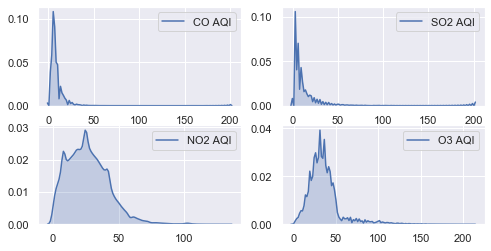

In [16]:
import seaborn as sb
from pylab import *
# Show all distribution plots simultaneously in four subplots 

sb.set(rc={"figure.figsize": (8, 4)})

subplot(2,2,1)
ax = sb.kdeplot(data_no_dupl['CO AQI'],shade=True)

subplot(2,2,2)
ax = sb.kdeplot(data_no_dupl['SO2 AQI'], shade=True)

subplot(2,2,3)
ax = sb.kdeplot(data_no_dupl['NO2 AQI'], shade=True)

subplot(2,2,4)
ax = sb.kdeplot(data_no_dupl['O3 AQI'], shade=True)

pp.show()

*To prevent outliers the common method of excluding data points that lie above the 99% quantile is applied below for all four variables.*

###### a) CO AQI

In [17]:
# Define 99% quantile
q1 = data_no_dupl['CO AQI'].quantile(0.99)
q1

33.0

In [18]:
# Dropping observations that are greater than the 99% quantile, which lies above the value 33.
CO_outliers = data_no_dupl[data_no_dupl['CO AQI'] > q1]
data_no_dupl = data_no_dupl.drop(CO_outliers.index, axis= 0)

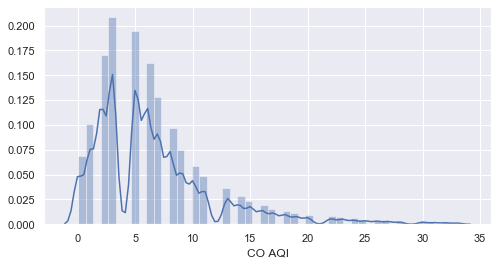

In [19]:
# Show the new data distribution after outliers were removed. 
sb.distplot(data_no_dupl['CO AQI'])

Most observations fall into the range between 0 and 10 parts per million.

###### b) SO2 AQI

In [20]:
# Define 99% quantile
q2 = data_no_dupl['SO2 AQI'].quantile(.99)
q2

69.0

In [21]:
# Dropping observations that are greater than the 99% quantile, which lies above the value 69.
SO2_outliers = data_no_dupl[data_no_dupl['SO2 AQI']>q2]
data_no_dupl = data_no_dupl.drop(SO2_outliers.index)

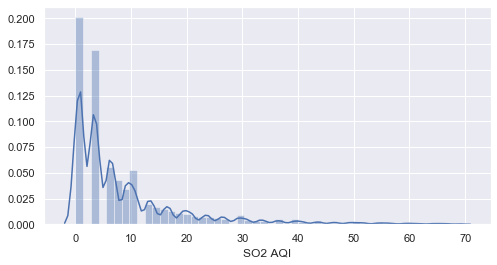

In [22]:
# Show the new data distribution after outliers were removed. 
sb.distplot(data_no_dupl['SO2 AQI'])

The majority of data points lie in the range between 0 and 10 parts per billion.

###### c) NO2 AQI

In [23]:
q3 = data_no_dupl['NO2 AQI'].quantile(.99)
q3

70.0

In [24]:
# Dropping observations that are greater than the 99% quantile, which lies above the value 70.
NO2_outliers = data_no_dupl[data_no_dupl['NO2 AQI']>q3]
data_no_dupl = data_no_dupl.drop(NO2_outliers.index)

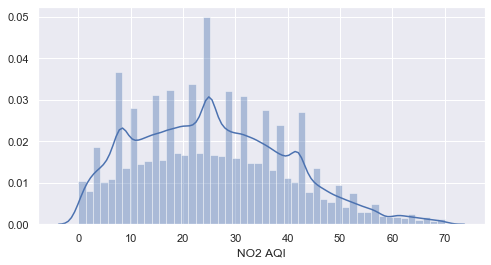

In [25]:
# Show the new data distribution after outliers were removed. 
sb.distplot(data_no_dupl['NO2 AQI'])

The data distribution nearly follows a normal distribution bell curve, except being slightly right-skewed.

###### d) O3 AQI

In [26]:
# Define 99% quantile
q4 = data_no_dupl['O3 AQI'].quantile(.99)
q4

119.0

In [27]:
# Dropping observations that are greater than the 99% quantile, which lies above the value 119.
O3_outliers = data_no_dupl[data_no_dupl['O3 AQI']>q4]
data_no_dupl = data_no_dupl.drop(O3_outliers.index)

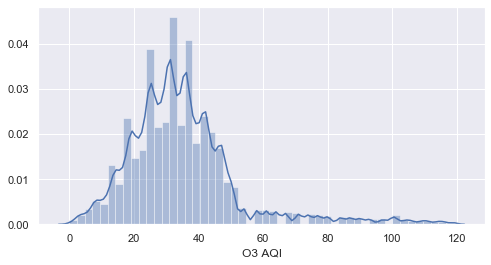

In [28]:
# Show the new data distribution after outliers were removed. 
sb.distplot(data_no_dupl['O3 AQI'])

The majority of data points lie in the range between 0 and 50 parts per million, while there can be observed a plummet for values greater than 50. Nonetheless, a few observations are present throughout the area of around 60 to 119 PPM.

##### Check and clean indiv. variables

1. State

In [29]:
data_no_dupl['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Country Of Mexico', 'Arkansas', 'Oregon', 'Wyoming',
       'North Dakota', 'Idaho', 'Ohio', 'Georgia'], dtype=object)

In [30]:
# Remove all rows that contain string 'Country Of Mexico' in column 'State'
data_var1 = data_no_dupl[~data_no_dupl.State.str.contains("Country Of Mexico")]

2. City

In [31]:
data_var1['City'].unique()

array(['Phoenix', 'Scottsdale', 'Tucson', 'Concord', 'Bethel Island',
       'San Pablo', 'Pittsburg', 'Calexico', 'Bakersfield', 'Burbank',
       'Los Angeles', 'Long Beach', 'Hawthorne', 'Costa Mesa', 'Rubidoux',
       'Not in a city', 'Arden-Arcade', 'Victorville', 'Chula Vista',
       'San Diego', 'San Francisco', 'Capitan', 'Lompoc', 'Goleta',
       'Vandenberg Air Force Base', 'Davenport', 'Vallejo', 'Welby',
       'Washington', 'Winter Park', 'Chicago', 'Cicero',
       'Calumet City (PU RR name Calumet Park (sta.))',
       'Indianapolis (Remainder)', 'Kansas City', 'Ashland',
       'Lexington-Fayette (corporate name for Lexington)', 'Henderson',
       'Louisville', 'Paducah', 'Baton Rouge', 'Detroit', 'Sunset Hills',
       'Ladue', 'Ferguson', 'St. Ann', 'St. Louis', 'Camden', 'New York',
       'Holtsville', 'Winston-Salem', 'Charlotte', 'Park Hill',
       'Ponca City', 'Pittsburgh', 'Beaver Falls', 'Reading', 'Altoona',
       'Bristol', 'Johnstown', 'Scranton', 'La

3. Date local

##### Convert Date Local to date format and extract year and month

In [32]:
import datetime as dt
# make copy of data first to avoid ~SettingWithCopyWarning~
data_var1 = data_var1[data_var1['Date Local'].notnull()].copy()
data_var1['Year_Month'] = pd.to_datetime(data_var1['Date Local']).dt.strftime('%Y-%m') #Year-Month
data_var1['Year'] = pd.to_datetime(data_var1['Date Local']).dt.strftime('%Y') #Year
data_var1['Month'] = pd.to_datetime(data_var1['Date Local']).dt.strftime('%m') #Year

#### Analysis : Air Quality (AQI) development over time in California

Take the AQI index of all four air pollution categories

In [34]:
# create sub data set with relevant variables only
pollution_df = data_var1[['Year_Month','Year','Month','State','City','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

##### Select California entries only  (obseverations for other states are relatively few)

In [96]:
pollution_CA = pollution_df [pollution_df['State'] == 'California'].reset_index(drop=True)
pollution_CA.head()

,Year_Month,Year,Month,State,City,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2000-01,2000,01,California,Concord,25,25,3.0,9.0
1,2000-02,2000,02,California,Concord,28,27,3.0,9.0
2,2000-03,2000,03,California,Concord,38,12,6.0,22.0
3,2000-04,2000,04,California,Concord,42,9,6.0,23.0
4,2000-05,2000,05,California,Concord,36,19,6.0,19.0


For better handling and to prevent data size exceeding plotly data limit, select only 10% of the California data.

In [77]:
CA_10per = pollution_CA.sample(frac=0.1)
CA_10per = CA_10per.sort_values('Year_Month').reset_index(drop=True)
CA_10per

,Year_Month,Year,Month,State,City,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2000-01,2000,01,California,Capitan,2,25,1.0,3.0
1,2000-01,2000,01,California,San Diego,35,24,29.0,10.0
2,2000-01,2000,01,California,Vallejo,22,30,6.0,9.0
3,2000-01,2000,01,California,San Pablo,31,28,7.0,15.0
4,2000-01,2000,01,California,Chula Vista,46,49,6.0,15.0
...,...,...,...,...,...,...,...,...,...
9524,2010-12,2010,12,California,Long Beach,13,23,0.0,0.0
9525,2010-12,2010,12,California,Concord,8,29,1.0,3.0
9526,2010-12,2010,12,California,San Diego,18,32,0.0,2.0
9527,2010-12,2010,12,California,San Pablo,25,17,3.0,7.0


##### Interactive plotting with Plotly

In [37]:
import plotly.express as px 
import cufflinks as cf            
import chart_studio.tools as tls
import plotly.graph_objs as go

Distribution of AQI values per AQI category in CA

In [103]:
# Create two new pd data frames
AQI_time= CA_10per[['Year_Month','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']] # all four AQIs incl. date
AQI = AQI_time.iloc[:,1:]  # all four AQIs only

In [39]:
AQI.iplot(kind='histogram', subplots= True, shape = (1,4),
                xaxis_title="Value", yaxis_title = 'Count',
                color=["red", "goldenrod", "#00D", 'lightgreen'],
                title= {'text': "Distribution of AQI values per AQI category in CA"},
                filename='US Pollution-CA-AQI-distrib-multiple-histo')

Measured NO2 values are far more spread out then those of other AQI categories.

#### Scatter pair plots to see correlations between the four AQI categories

Wall time: 3.01 s


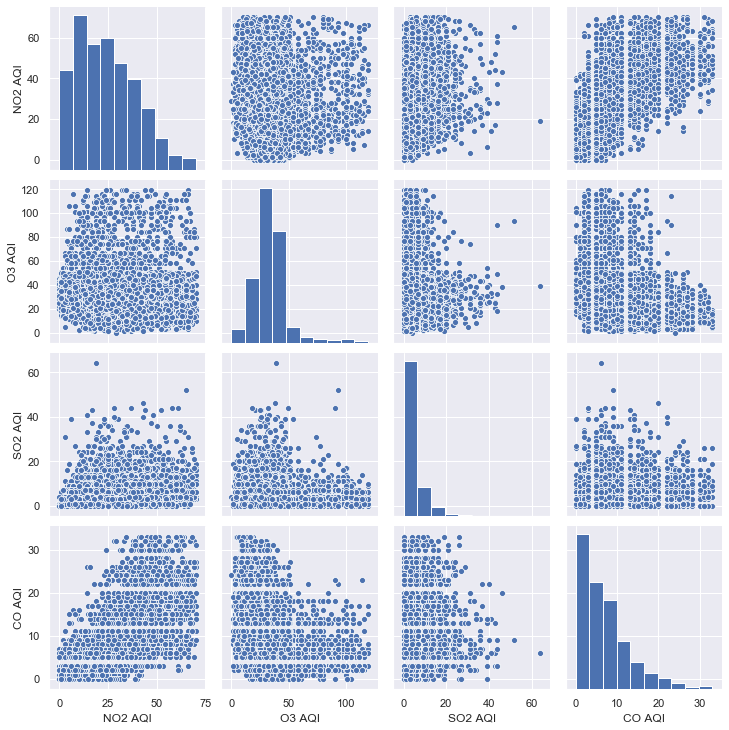

In [40]:
%time sb.pairplot(AQI)

Linear relationships can only be (to some extent) observed between NO2 and CO, and and O3 and CO.

##### Subplots for each AQI category over time

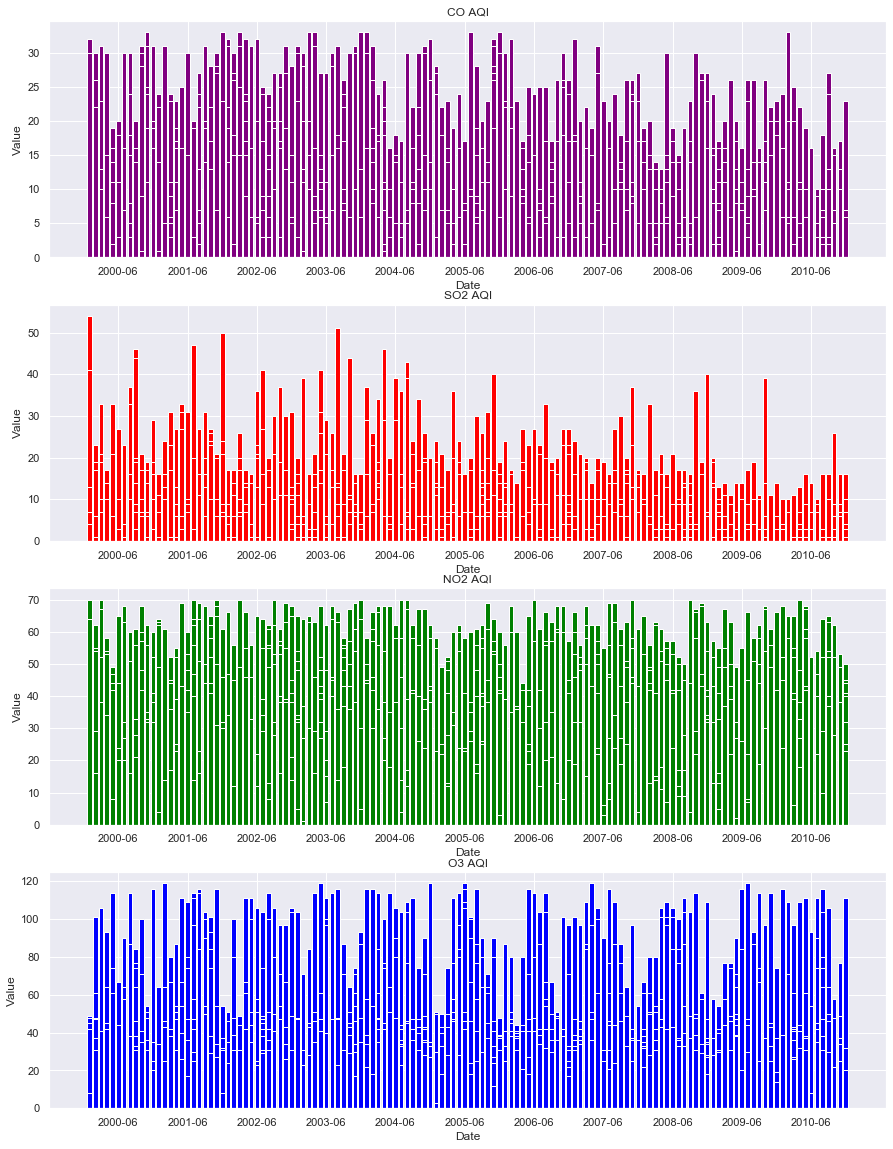

Wall time: 1min 8s


In [104]:
%%time 
fig, (ax1, ax2,ax3,ax4) = pp.subplots(4,1, figsize = (15,20)) # 4 rows, 1 column
for ax in ax1, ax2,ax3,ax4:
    ax.set(xlabel='Date')
    ax.set(ylabel='Value')

ax1.bar(AQI_time['Year_Month'],AQI_time['CO AQI'], color = 'purple')
ax1.set_title('CO AQI')
ax1.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06']) 

ax2.bar(AQI_time['Year_Month'], AQI_time['SO2 AQI'], color = 'red')
ax2.set_title('SO2 AQI')
ax2.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06']) 

ax3.bar(AQI_time['Year_Month'],AQI_time['NO2 AQI'], color = 'green')
ax3.set_title('NO2 AQI')
ax3.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06']) 

ax4.bar(AQI_time['Year_Month'],AQI_time['O3 AQI'], color = 'blue')
ax4.set_title('O3 AQI')
ax4.set_xticks(['2000-06','2001-06','2002-06','2003-06','2004-06','2005-06','2006-06','2007-06','2008-06','2009-06','2010-06']) 

pp.show()

While we observe reoccuring seasonal patterns for all of the four air quality index categories,
for CO,SO2 and NO2 we see that values are not as spread as they are for O3 and the overall measured values tend to have declined over the last years. In general, pollution appears to be highest in summer and lowest in winter. 

##### Development of monthly average AQI values

a) Basic line chart with monthly mean values for each AQI category

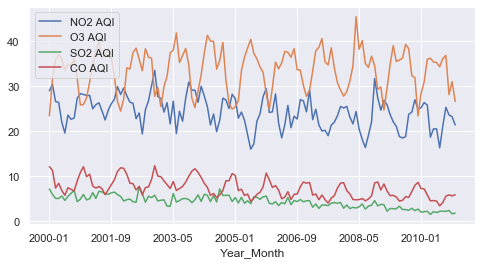

In [108]:
AQI_time_grouped =AQI_time.groupby(['Year_Month']).mean().plot()

b) Interactive scatter plot with several monthly records for each AQI category

In [112]:
# All four AQI categories over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=CA_10per['Year_Month'], y=CA_10per['NO2 AQI'],
                    mode='lines', name='NO2 AQI', opacity=0.7))
fig.add_trace(go.Scatter(x=CA_10per['Year_Month'], y=CA_10per['O3 AQI'],
                    mode='lines', name='O3 AQI', opacity=0.7))
fig.add_trace(go.Scatter(x=CA_10per['Year_Month'], y=CA_10per['SO2 AQI'],
                    mode='lines', name='SO2 AQI', opacity=1.0))
fig.add_trace(go.Scatter(x=CA_10per['Year_Month'], y=CA_10per['CO AQI'],
                    mode='markers', name='CO AQI', opacity=0.6))
fig.update_layout(legend_title_text = "AQI categories",
                  title='AQI categories 2000-2010')
fig.update_yaxes(title_text="Value (in PPM/PPB)")
fig.update_xaxes(title_text="Time")
fig.show()

Both charts represent the relatively wide-spread records of NO2 and O3. The upper graph shows that their monthly means lie between 20-30 parts per billion and 30-40 parts per million, respectively. Noteworthy, though, is the high frequency of very high values measured within months, as shown in the lower graph.

##### Animated scatter for the development of Californian cities' O3 vs. NO2 relation over time

In [115]:
fig = px.scatter(CA_10per,x='O3 AQI', y='NO2 AQI', 
             animation_frame='Year', animation_group='City',color='City',
             range_y=[0, 90], range_x=[0, 100])
fig.show()